In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [27]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_PBR_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

## **전체기간 총 상장 주식 수는 5015개**

In [28]:
stock_name_ls = raw_rt.iloc[1,1:].tolist()

In [29]:
len(stock_name_ls)

5015

## **보통주만 선별하는 작업 필요**

In [30]:
stock_name_ls[:10]

['조흥은행',
 '조흥은행(1신)',
 '조흥은행(2신)',
 '동화약품',
 '동화약품공업(1신)',
 '동화약품(전환1신)',
 '동화약품(전환2신)',
 '우리은행',
 '한빛은행(1신)',
 '한국상업은행(2신)']

## **Raw 데이터에 문제가 있는 16개 기업 제거**

In [31]:
error_stock_ls = ['삼성물산','알루코','하나은행','두산건설','SK',
                  '고려시멘트','광주은행','경남은행','신성이엔지',
                  '현대리바트','세원','풀무원','국민은행','핸디소프트',
                  '아이티센', '에스와이코퍼레이션']

In [32]:
stock_name_ls = [x for x in stock_name_ls if not x in error_stock_ls]

In [33]:
def clean_uncommon_stocks(stock_name_ls):
    # (1신) 꼴 제거
    unwanted_word_ls = ['(', '1신', '2신', '3신','4신','우B','우C','1','2','3','우선','스팩']
    
    for unwanted_word in unwanted_word_ls:
        stock_name_ls = [x for x in stock_name_ls if not unwanted_word in x]
    
    stock_name_ls = [x for x in stock_name_ls if not x[-1] == '우']
    return stock_name_ls

## **최종적으로 선정된 주식의 수는 2900개**

In [34]:
common_stock_ls = clean_uncommon_stocks(stock_name_ls)
len(common_stock_ls)

2900

# 성과지표 데이터프레임 전처리 수행

In [35]:
per_df = Ko.Preprocessing(raw_per, column = '기업명', drop_limit=0)
per_df = per_df.loc[common_stock_ls]

/home/donghyungko/anaconda3/envs/fininsight_python3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [36]:
len(per_df)

2900

# 수익률 DF 전처리

In [37]:
rt_df = Ko.Preprocessing(raw_rt, column = '기업명', drop_limit=0).apply(lambda x: Ko.rt_transform(x), axis = 1)

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [38]:
rt_df.loc['조흥은행'].iloc[173:178]

20040630    0.8571
20040731    1.0000
20040831    0.0000
20040930       NaN
20041031       NaN
Name: 조흥은행, dtype: float64

In [39]:
len(rt_df)

2900

# 포트폴리오 구성 수행

In [40]:
data = Ko.portfolio_selection(per_df)

In [41]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
조흥은행,x,4,3,3,4,4,4,5,4,4,...,x,x,x,x,x,x,x,x,x,x
동화약품,x,6,6,6,5,4,4,4,5,5,...,2,3,3,3,4,4,3,3,3,4
우리은행,x,9,9,9,9,9,9,9,9,9,...,1,0,1,0,1,0,0,0,1,1
KR모터스,x,5,5,5,5,5,4,5,4,3,...,6,5,5,6,5,6,6,6,6,6
경방,x,2,2,2,3,2,3,4,4,5,...,1,0,1,1,1,1,1,0,1,1


# 포트폴리오 성과분석

In [42]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [43]:
result.min()

GROUP_0    0.659957
GROUP_1    0.702738
GROUP_2    0.706618
GROUP_3    0.702620
GROUP_4    0.693324
GROUP_5    0.698146
GROUP_6    0.684202
GROUP_7    0.682104
GROUP_8    0.683531
GROUP_9    0.622747
dtype: float64

In [44]:
result.max()

GROUP_0    2.135852
GROUP_1    1.519126
GROUP_2    1.514587
GROUP_3    1.585952
GROUP_4    1.520274
GROUP_5    1.500158
GROUP_6    1.467319
GROUP_7    1.739918
GROUP_8    1.660601
GROUP_9    1.589292
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

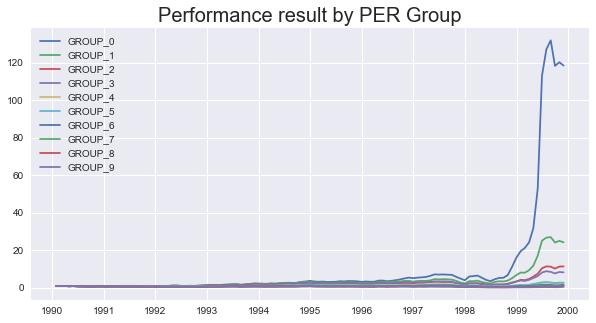

In [45]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

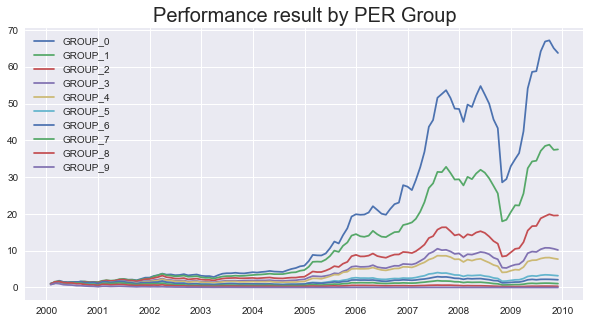

In [46]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

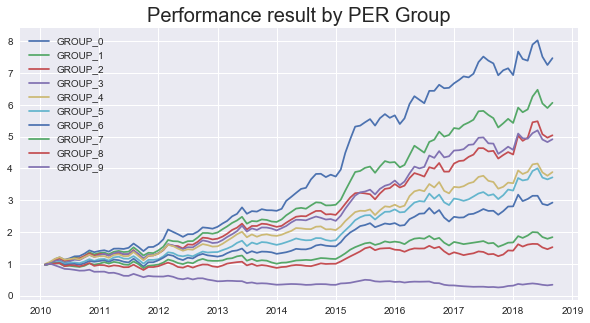

In [47]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

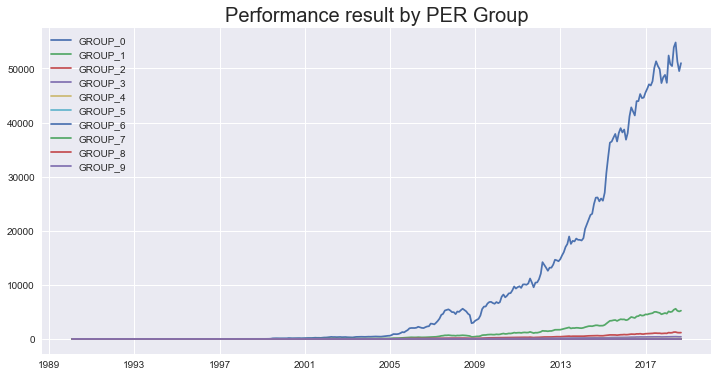

In [48]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

In [49]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.032,1.025,1.021,1.018,1.013,1.010,1.007,1.003,0.998,0.980
arith_mean_return,1.038,1.029,1.025,1.021,1.017,1.014,1.011,1.007,1.002,0.986
std,0.118,0.095,0.092,0.090,0.092,0.089,0.092,0.101,0.099,0.103
min,0.660,0.703,0.707,0.703,0.693,0.698,0.684,0.682,0.684,0.623
25%,0.982,0.977,0.977,0.971,0.969,0.967,0.964,0.956,0.950,0.934
50%,1.024,1.020,1.015,1.016,1.013,1.010,1.009,1.007,0.998,0.979
75%,1.074,1.069,1.065,1.066,1.060,1.060,1.055,1.054,1.049,1.034
max,2.136,1.519,1.515,1.586,1.520,1.500,1.467,1.740,1.661,1.589


In [25]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.032,1.025,1.021,1.018,1.013,1.010,1.007,1.003,0.998,0.980
arith_mean_return,1.038,1.029,1.025,1.021,1.017,1.014,1.011,1.007,1.002,0.986
std,0.118,0.095,0.092,0.090,0.092,0.089,0.092,0.101,0.099,0.103
min,0.660,0.703,0.707,0.703,0.693,0.698,0.684,0.682,0.684,0.623
25%,0.982,0.977,0.977,0.971,0.969,0.967,0.964,0.956,0.950,0.934
50%,1.024,1.020,1.015,1.016,1.013,1.010,1.009,1.007,0.998,0.979
75%,1.074,1.069,1.065,1.066,1.060,1.060,1.055,1.054,1.049,1.034
max,2.136,1.519,1.515,1.586,1.520,1.500,1.467,1.740,1.661,1.589
